In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("Full_Data.xlsx", index_col=0)

In [3]:
df.head()

,G_DEU,G_ESP,G_FRA,G_GBR,G_IRL,G_ITA,G_NLD,G_WAV,S_DEU,S_ESP,S_FRA,S_GBR,S_IRL,S_ITA,S_NLD,S_WAV,Recession
DATE,,,,,,,,,,,,,,,,,
1970-01-31,-1.590000,1.869665,1.910000,-0.620000,1.700898,5.990000,-1.492127,0.819700,-1.69,0.340000,-1.61,2.830000,4.025000,-0.490000,4.330000,-0.135695,0
1970-02-28,0.266667,1.299398,1.693333,0.366667,0.937200,4.236662,-0.084976,1.286738,-1.71,0.315637,-1.02,2.617917,4.101583,-0.517211,4.361667,-0.058400,0
1970-03-31,2.123333,0.729131,1.476667,1.353333,0.173503,2.483325,1.322176,1.758106,-1.71,0.291274,-0.79,2.475833,4.178166,-0.544421,4.333333,-0.042632,0
1970-04-30,3.980000,0.158864,1.260000,2.340000,-0.590195,0.729987,2.729327,2.233664,-1.76,0.266911,-0.32,2.483750,4.254748,-0.571632,4.315000,0.037857,0
1970-05-31,3.276667,0.276270,1.300000,1.893333,-0.387093,1.155437,2.329581,1.994116,-1.53,0.242548,-0.40,2.731667,4.331331,-0.598843,4.356667,0.136605,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[["S_DEU","G_DEU"]]
y = df["Recession"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.242, random_state=101, shuffle = False)

In [7]:
X_test.head()

,S_DEU,G_DEU
DATE,,
2006-01-31,0.81,0.930000
2006-02-28,0.87,1.153333
2006-03-31,0.92,1.376667
2006-04-30,1.10,1.600000
2006-05-31,1.07,1.400000


In [8]:
from sklearn.svm import SVC 
model = SVC()

In [9]:
model.fit(X_train, y_train)
#C coontrolls the cause of misclassification on the training data
#large C gives you: low bias and high variance, vice versa 
#small gamma leads to a low bias high variance 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
predict = model.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
print(confusion_matrix(y_test, predict))
print("\n")
print(classification_report(y_test, predict))

[[88 13]
 [11 27]]


             precision    recall  f1-score   support

          0       0.89      0.87      0.88       101
          1       0.68      0.71      0.69        38

avg / total       0.83      0.83      0.83       139



In [13]:
print(confusion_matrix(y_test, predict))
print("\n")
print(classification_report(y_test, predict))

[[88 13]
 [11 27]]


             precision    recall  f1-score   support

          0       0.89      0.87      0.88       101
          1       0.68      0.71      0.69        38

avg / total       0.83      0.83      0.83       139



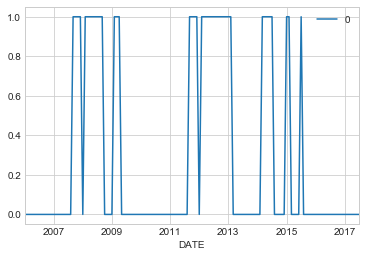

In [14]:
pd_predict = pd.DataFrame(predict,index=X_test.index)
pd_predict.plot()

In [15]:
pd_predict.to_excel("SVM_DEU_NO_GRID.xlsx")

In [16]:
#Searching the best variable with a grid search (best combinatinos)
from sklearn.grid_search import GridSearchCV

C:\Users\anton\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\anton\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [17]:
param_grid = {"C":[0.1,0.01,0.2,0.3,0.4,0.5,0.6,0.7,1,2,4,5,6,7,8,9,10,30,40,45,50,100], "gamma":[1,0.1,0.01,0.001,0.0001]} 
#the keys/actual parameters which I'll use for the model 

In [18]:
grid = GridSearchCV(SVC(), param_grid, verbose=1)

In [19]:
grid.fit(X_train, y_train)
#verbose is the text output

Fitting 3 folds for each of 110 candidates, totalling 330 fits


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    2.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 2, 4, 5, 6, 7, 8, 9, 10, 30, 40, 45, 50, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [20]:
grid.best_params_

{'C': 0.3, 'gamma': 0.1}

In [21]:
grid_predictions = grid.predict(X_test)

In [22]:
print(confusion_matrix(y_test, grid_predictions))
print("\n")
print(classification_report(y_test, grid_predictions))

[[67 34]
 [ 6 32]]


             precision    recall  f1-score   support

          0       0.92      0.66      0.77       101
          1       0.48      0.84      0.62        38

avg / total       0.80      0.71      0.73       139



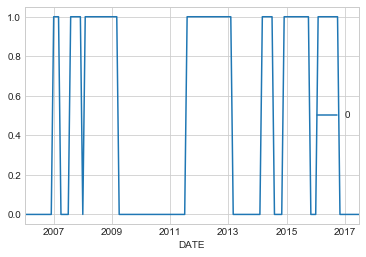

In [24]:
pd_grid = pd.DataFrame(grid_predictions,index=X_test.index)
pd_grid.plot()

In [25]:
pd_grid.to_excel("SVM_DEU_GRID.xlsx")